In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [2]:
import yfinance as yf

In [3]:
#Download Tata motors data from yahoo finance
df = yf.download('YESBANK.NS')

[*********************100%***********************]  1 of 1 completed


In [4]:
#first 5 samples
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-07-12,13.18,14.00,12.00,12.17,10.848566,244941515
2005-07-13,12.20,12.60,11.49,11.74,10.465257,64111620
2005-07-14,12.00,12.00,11.40,11.45,10.206744,16282865
2005-07-15,11.25,12.89,11.25,12.37,11.026852,75448030
2005-07-18,12.54,13.14,12.50,12.82,11.427990,75684775


In [5]:
# to check dates in index
df.index

DatetimeIndex(['2005-07-12', '2005-07-13', '2005-07-14', '2005-07-15',
               '2005-07-18', '2005-07-19', '2005-07-20', '2005-07-21',
               '2005-07-22', '2005-07-25',
               ...
               '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16',
               '2023-06-19', '2023-06-20', '2023-06-21', '2023-06-22',
               '2023-06-23', '2023-06-26'],
              dtype='datetime64[ns]', name='Date', length=4430, freq=None)

In [6]:
# to check features or columns 
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-20,16.299999,16.400000,16.15,16.250000,16.250000,62344783
2023-06-21,16.250000,16.350000,16.15,16.200001,16.200001,43815628
2023-06-22,16.200001,16.299999,15.95,16.000000,16.000000,52482954
2023-06-23,16.000000,16.100000,15.90,16.000000,16.000000,42620606
2023-06-26,16.049999,16.350000,16.00,16.100000,16.100000,68847969


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4430 entries, 2005-07-12 to 2023-06-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4430 non-null   float64
 1   High       4430 non-null   float64
 2   Low        4430 non-null   float64
 3   Close      4430 non-null   float64
 4   Adj Close  4430 non-null   float64
 5   Volume     4430 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 242.3 KB


In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

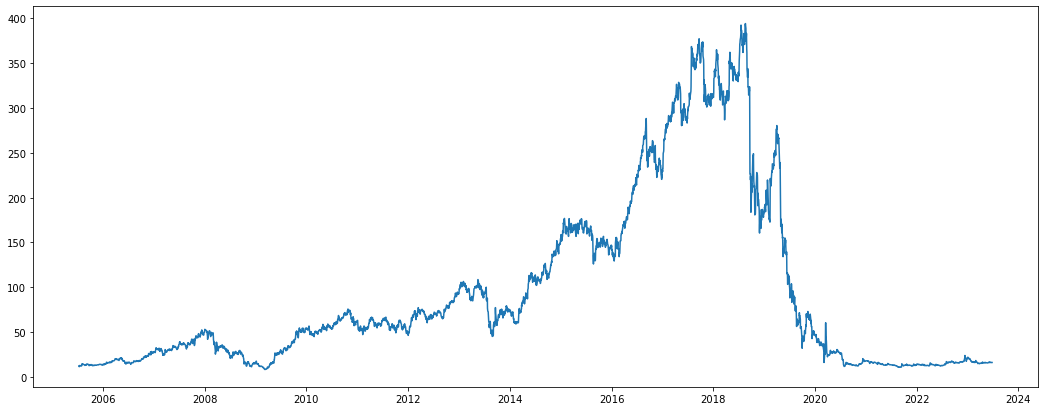

In [11]:
# plot a graph of tata motors 
plt1 = plt.figure(figsize=(18,7))
import matplotlib.pyplot as plt
plt.plot(df['Close'])

In [12]:
# check open price for first day and close price for last day
print("Starting price: ",df.iloc[0][0])
print("Ending price: ", df.iloc[-1][3])

Starting price:  13.180000305175781
Ending price:  16.100000381469727


In [13]:
# check start date and end date in our dataset
print("Starting date: ",df.index[0])
print("Ending date: ", df.index[-1])

Starting date:  2005-07-12 00:00:00
Ending date:  2023-06-26 00:00:00


In [14]:
# drop all columns except 'close ' columns as we are going to do prediction only on closing price
df.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

In [15]:
actual_prices = df['Close'].values

In [16]:
actual_prices

array([12.17000008, 11.73999977, 11.44999981, ..., 16.        ,
       16.        , 16.10000038])

In [17]:
actual_returns = (actual_prices[1:] - actual_prices[:-1]) / actual_prices[:-1]

In [18]:
actual_returns

array([-0.03533281, -0.02470187,  0.08034935, ..., -0.01234573,
        0.        ,  0.00625002])

In [19]:
actual_returns.cumsum()

array([-0.03533281, -0.06003468,  0.02031467, ...,  3.22385997,
        3.22385997,  3.23011   ])

In [20]:
df.head()

,Close
Date,
2005-07-12,12.17
2005-07-13,11.74
2005-07-14,11.45
2005-07-15,12.37
2005-07-18,12.82


In [21]:
# Resample the data to weekly frequency.we can use mean or last
df = df.resample('W').mean()

In [22]:
df.head()

,Close
Date,
2005-07-17,11.9325
2005-07-24,12.6440
2005-07-31,12.5360
2005-08-07,13.9080
2005-08-14,14.1680


In [23]:
df.tail()

,Close
Date,
2023-06-04,16.14
2023-06-11,16.33
2023-06-18,16.28
2023-06-25,16.14
2023-07-02,16.10


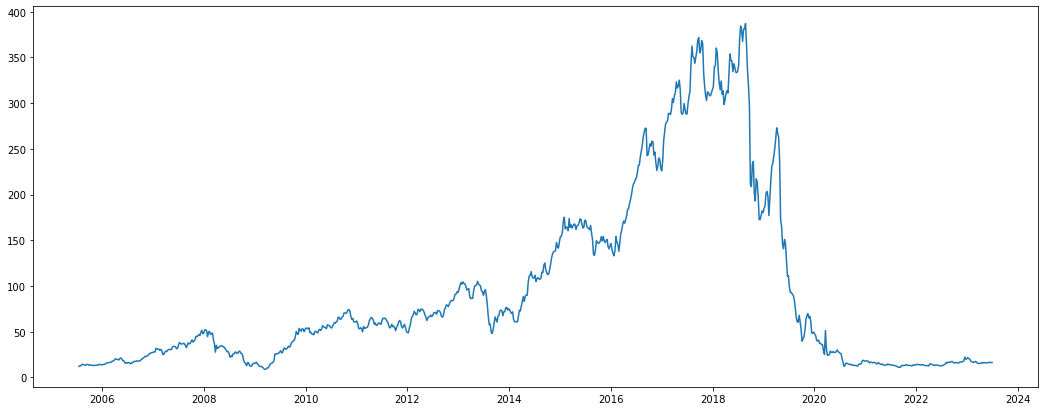

In [24]:
# plot a chart for tata motors
plt1 = plt.figure(figsize=(18,7))
import matplotlib.pyplot as plt
plt.plot(df['Close'])

In [25]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
# Preprocess the data
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [26]:
df1

array([[0.00902416],
       [0.01090385],
       [0.01061853],
       [0.01424316],
       [0.01493005],
       [0.01387198],
       [0.01214552],
       [0.01304376],
       [0.01434751],
       [0.01518366],
       [0.01245726],
       [0.01281127],
       [0.01332379],
       [0.01260389],
       [0.01148506],
       [0.01169112],
       [0.01213495],
       [0.01209797],
       [0.01241235],
       [0.01334493],
       [0.01351401],
       [0.01472926],
       [0.0145232 ],
       [0.01379404],
       [0.01374649],
       [0.01447036],
       [0.01463812],
       [0.01582299],
       [0.01875282],
       [0.01891926],
       [0.01961803],
       [0.02014508],
       [0.02067345],
       [0.02091651],
       [0.02385954],
       [0.02486873],
       [0.0256243 ],
       [0.03031625],
       [0.03103088],
       [0.02853211],
       [0.02928064],
       [0.02774308],
       [0.03196213],
       [0.03326457],
       [0.03058044],
       [0.0254975 ],
       [0.02519632],
       [0.020

In [27]:
# Split data into training and testing sets
train_size=int(len(df1)*0.6)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [28]:
train_size,test_size

(562, 376)

In [29]:
train_data

array([[0.00902416],
       [0.01090385],
       [0.01061853],
       [0.01424316],
       [0.01493005],
       [0.01387198],
       [0.01214552],
       [0.01304376],
       [0.01434751],
       [0.01518366],
       [0.01245726],
       [0.01281127],
       [0.01332379],
       [0.01260389],
       [0.01148506],
       [0.01169112],
       [0.01213495],
       [0.01209797],
       [0.01241235],
       [0.01334493],
       [0.01351401],
       [0.01472926],
       [0.0145232 ],
       [0.01379404],
       [0.01374649],
       [0.01447036],
       [0.01463812],
       [0.01582299],
       [0.01875282],
       [0.01891926],
       [0.01961803],
       [0.02014508],
       [0.02067345],
       [0.02091651],
       [0.02385954],
       [0.02486873],
       [0.0256243 ],
       [0.03031625],
       [0.03103088],
       [0.02853211],
       [0.02928064],
       [0.02774308],
       [0.03196213],
       [0.03326457],
       [0.03058044],
       [0.0254975 ],
       [0.02519632],
       [0.020

In [30]:
# convert an array of values into a dataset matrix
#function to create new dataset which is required by LSTM.giving sequence of data to our LSTM model
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), numpy.array(dataY)

In [31]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
import numpy
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
X_train

array([[0.00902416, 0.01090385, 0.01061853, ..., 0.0685757 , 0.06510429,
        0.06447685],
       [0.01090385, 0.01061853, 0.01424316, ..., 0.06510429, 0.06447685,
        0.06005834],
       [0.01061853, 0.01424316, 0.01493005, ..., 0.06447685, 0.06005834,
        0.05584721],
       ...,
       [0.24424371, 0.25475304, 0.24767813, ..., 0.36641928, 0.39255654,
        0.4034899 ],
       [0.25475304, 0.24767813, 0.24425428, ..., 0.39255654, 0.4034899 ,
        0.420153  ],
       [0.24767813, 0.24425428, 0.24220419, ..., 0.4034899 , 0.420153  ,
        0.42931673]])

In [33]:
y_train

array([0.06005834, 0.05584721, 0.05168892, 0.0523124 , 0.04636293,
       0.03566867, 0.03903968, 0.03675183, 0.04475667, 0.04440266,
       0.04967054, 0.05050801, 0.04682261, 0.04673279, 0.05207331,
       0.05327404, 0.04734041, 0.04637878, 0.04072651, 0.02603115,
       0.01984919, 0.01751379, 0.01100776, 0.02004469, 0.01895756,
       0.01165414, 0.00981012, 0.00945611, 0.01556277, 0.01823766,
       0.01712147, 0.01848203, 0.02115692, 0.01601321, 0.01383103,
       0.00924872, 0.00864241, 0.00922362, 0.0071207 , 0.00509439,
       0.00157807, 0.        , 0.00122406, 0.00434674, 0.00462546,
       0.00804007, 0.01465133, 0.01768287, 0.01805933, 0.02112257,
       0.02358479, 0.04451891, 0.04363124, 0.04646331, 0.04588211,
       0.04693885, 0.05089636, 0.05457383, 0.04779481, 0.0501038 ,
       0.0600055 , 0.06245715, 0.0581879 , 0.05982586, 0.06205559,
       0.06775673, 0.06501976, 0.0681213 , 0.07739424, 0.07941659,
       0.08334195, 0.08417854, 0.09517398, 0.10973856, 0.10349

In [34]:
X_test

array([[0.44412571, 0.4629001 , 0.46530419, ..., 0.49672518, 0.54888216,
        0.58806098],
       [0.4629001 , 0.46530419, 0.48028884, ..., 0.54888216, 0.58806098,
        0.59619131],
       [0.46530419, 0.48028884, 0.49172282, ..., 0.58806098, 0.59619131,
        0.61754417],
       ...,
       [0.02262315, 0.00909681, 0.01165942, ..., 0.01924156, 0.01866036,
        0.0201398 ],
       [0.00909681, 0.01165942, 0.01844901, ..., 0.01866036, 0.0201398 ,
        0.02064175],
       [0.01165942, 0.01844901, 0.01792063, ..., 0.0201398 , 0.02064175,
        0.02050966]])

In [35]:
print(X_train.shape) 

(411, 150)


In [36]:
print(y_train.shape)

(411,)


In [37]:
print(X_test.shape)

(225, 150)


In [38]:
 print(ytest.shape)

(225,)


In [39]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
X_train.shape

(411, 150, 1)

In [41]:
X_train

array([[[0.00902416],
        [0.01090385],
        [0.01061853],
        ...,
        [0.0685757 ],
        [0.06510429],
        [0.06447685]],

       [[0.01090385],
        [0.01061853],
        [0.01424316],
        ...,
        [0.06510429],
        [0.06447685],
        [0.06005834]],

       [[0.01061853],
        [0.01424316],
        [0.01493005],
        ...,
        [0.06447685],
        [0.06005834],
        [0.05584721]],

       ...,

       [[0.24424371],
        [0.25475304],
        [0.24767813],
        ...,
        [0.36641928],
        [0.39255654],
        [0.4034899 ]],

       [[0.25475304],
        [0.24767813],
        [0.24425428],
        ...,
        [0.39255654],
        [0.4034899 ],
        [0.420153  ]],

       [[0.24767813],
        [0.24425428],
        [0.24220419],
        ...,
        [0.4034899 ],
        [0.420153  ],
        [0.42931673]]])

In [42]:
### Create the Stacked LSTM model
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model

In [43]:
#model=Sequential()
#model.add(LSTM(300, input_shape = (time_step , 1), return_sequences=True))
#model.add(Dropout(0.5))
#model.add(LSTM(200, input_shape=(time_step , 1), return_sequences=False))
#model.add(Dropout(0.5))
#model.add(Dense(100,kernel_initializer='uniform',activation='relu'))        
#model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
#model.compile(loss='mse',optimizer='adam')

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 150, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 3s 503ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 2/100
7/7 [==============================] - 2s 323ms/step - loss: 0.0028 - val_loss: 0.0117
Epoch 3/100
7/7 [==============================] - 2s 335ms/step - loss: 0.0019 - val_loss: 0.0045
Epoch 4/100
7/7 [==============================] - 2s 359ms/step - loss: 0.0013 - val_loss: 0.0082
Epoch 5/100
7/7 [==============================] - 2s 369ms/step - loss: 0.0013 - val_loss: 0.0052
Epoch 6/100
7/7 [==============================] - 3s 386ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 7/100
7/7 [==============================] - 3s 367ms/step - loss: 0.0010 - val_loss: 0.0055
Epoch 8/100
7/7 [==============================] - 3s 369ms/step - loss: 9.8614e-04 - val_loss: 0.0056
Epoch 9/100
7/7 [==============================] - 2s 341ms/step - loss: 9.6053e-04 - val_loss: 0.0054
Epoch 10/100
7/7 [==============================] - 2s 337ms/step - loss: 9.6643e-04 - val_loss: 0.00

7/7 [==============================] - 2s 360ms/step - loss: 4.1108e-04 - val_loss: 0.0012
Epoch 81/100
7/7 [==============================] - 2s 335ms/step - loss: 4.2379e-04 - val_loss: 0.0012
Epoch 82/100
7/7 [==============================] - 2s 343ms/step - loss: 4.0329e-04 - val_loss: 0.0014
Epoch 83/100
7/7 [==============================] - 2s 334ms/step - loss: 3.8725e-04 - val_loss: 0.0014
Epoch 84/100
7/7 [==============================] - 2s 332ms/step - loss: 3.9586e-04 - val_loss: 0.0012
Epoch 85/100
7/7 [==============================] - 2s 340ms/step - loss: 4.0628e-04 - val_loss: 0.0011
Epoch 86/100
7/7 [==============================] - 2s 340ms/step - loss: 4.0351e-04 - val_loss: 0.0012
Epoch 87/100
7/7 [==============================] - 2s 335ms/step - loss: 3.7988e-04 - val_loss: 0.0013
Epoch 88/100
7/7 [==============================] - 2s 335ms/step - loss: 3.5523e-04 - val_loss: 0.0013
Epoch 89/100
7/7 [==============================] - 3s 371ms/step - loss: 3.7

In [47]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 57ms/step


In [48]:
train_predict

array([[0.06578428],
       [0.06617052],
       [0.06526485],
       [0.06304168],
       [0.06008918],
       [0.05652688],
       [0.05197725],
       [0.04727367],
       [0.04291919],
       [0.039978  ],
       [0.0385832 ],
       [0.03887479],
       [0.04045523],
       [0.04239764],
       [0.04413322],
       [0.04582166],
       [0.0474643 ],
       [0.04843007],
       [0.0485401 ],
       [0.04749797],
       [0.04443733],
       [0.03945709],
       [0.03339853],
       [0.0268517 ],
       [0.02140158],
       [0.01759948],
       [0.01491442],
       [0.01295809],
       [0.01154824],
       [0.01105792],
       [0.01158912],
       [0.01275187],
       [0.01423978],
       [0.01592837],
       [0.01716625],
       [0.01757963],
       [0.01687472],
       [0.01526607],
       [0.0132344 ],
       [0.0110421 ],
       [0.0088318 ],
       [0.00656338],
       [0.00430559],
       [0.00235256],
       [0.00110349],
       [0.00061167],
       [0.00097666],
       [0.002

In [49]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [50]:
train_predict

array([[ 33.41739 ],
       [ 33.563587],
       [ 33.22077 ],
       [ 32.379253],
       [ 31.261675],
       [ 29.913269],
       [ 28.19114 ],
       [ 26.410736],
       [ 24.762472],
       [ 23.649172],
       [ 23.12121 ],
       [ 23.231585],
       [ 23.829813],
       [ 24.56506 ],
       [ 25.222008],
       [ 25.861122],
       [ 26.482891],
       [ 26.84846 ],
       [ 26.890108],
       [ 26.495638],
       [ 25.33712 ],
       [ 23.451998],
       [ 21.158707],
       [ 18.680595],
       [ 16.617613],
       [ 15.178436],
       [ 14.162087],
       [ 13.421575],
       [ 12.887917],
       [ 12.702322],
       [ 12.903392],
       [ 13.343514],
       [ 13.906719],
       [ 14.545887],
       [ 15.014452],
       [ 15.170922],
       [ 14.904101],
       [ 14.295192],
       [ 13.526163],
       [ 12.696332],
       [ 11.859689],
       [ 11.001043],
       [ 10.146421],
       [  9.407159],
       [  8.93436 ],
       [  8.748197],
       [  8.886353],
       [  9.4

In [51]:
test_predict

array([[195.88347  ],
       [206.76028  ],
       [219.36113  ],
       [231.8908   ],
       [243.88127  ],
       [255.33928  ],
       [262.6992   ],
       [263.71558  ],
       [253.8895   ],
       [224.72583  ],
       [186.72867  ],
       [149.29083  ],
       [120.436745 ],
       [105.092766 ],
       [101.54812  ],
       [104.16849  ],
       [107.68495  ],
       [110.90174  ],
       [112.05833  ],
       [110.8445   ],
       [108.26301  ],
       [105.08911  ],
       [101.88578  ],
       [ 98.502144 ],
       [ 94.25146  ],
       [ 88.388176 ],
       [ 81.272316 ],
       [ 74.01678  ],
       [ 68.4446   ],
       [ 64.32375  ],
       [ 60.71668  ],
       [ 56.246048 ],
       [ 51.555706 ],
       [ 47.498993 ],
       [ 45.201588 ],
       [ 45.719425 ],
       [ 48.934227 ],
       [ 53.926846 ],
       [ 58.962616 ],
       [ 63.17561  ],
       [ 65.51196  ],
       [ 64.70294  ],
       [ 61.438618 ],
       [ 57.05302  ],
       [ 52.469036 ],
       [ 4

In [52]:
ytest

array([0.59619131, 0.61754417, 0.63763552, 0.66801695, 0.69862291,
       0.68332652, 0.67120921, 0.60333094, 0.4333535 , 0.41388299,
       0.36078154, 0.34897242, 0.37594584, 0.36423577, 0.31690021,
       0.26958445, 0.27138092, 0.23856899, 0.22274423, 0.22292916,
       0.2177247 , 0.21458088, 0.20187351, 0.17969068, 0.15122901,
       0.13825747, 0.13637514, 0.15661841, 0.13910286, 0.11751885,
       0.08188673, 0.08941604, 0.09403269, 0.11392592, 0.14390445,
       0.15638064, 0.16153888, 0.14916836, 0.15371237, 0.13846882,
       0.10515493, 0.10560405, 0.1079421 , 0.10187902, 0.09812758,
       0.08296329, 0.08275194, 0.08505036, 0.07567175, 0.07561891,
       0.0719137 , 0.07157686, 0.05411415, 0.043976  , 0.11271066,
       0.06061313, 0.04050856, 0.0428422 , 0.04242391, 0.05337443,
       0.05031647, 0.04888326, 0.05215917, 0.04912103, 0.04939182,
       0.05097033, 0.05683527, 0.05202708, 0.04941163, 0.04671693,
       0.04621498, 0.0316319 , 0.02262315, 0.00909681, 0.01165

In [53]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))



86.1076402408166

In [54]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

63.21387925212377

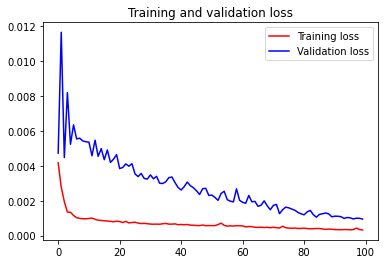

<Figure size 432x288 with 0 Axes>

In [55]:
### plot a graph for training and validation loss to visualize the results of model training

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.figure()


plt.show()

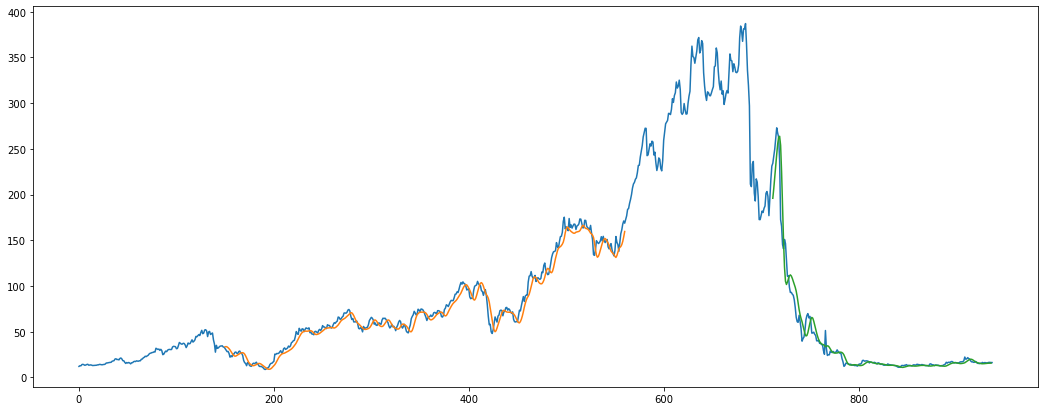

In [56]:
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)  ## to take same shape and sata type of df1
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt1 = plt.figure(figsize=(18,7))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [57]:
ytest

array([0.59619131, 0.61754417, 0.63763552, 0.66801695, 0.69862291,
       0.68332652, 0.67120921, 0.60333094, 0.4333535 , 0.41388299,
       0.36078154, 0.34897242, 0.37594584, 0.36423577, 0.31690021,
       0.26958445, 0.27138092, 0.23856899, 0.22274423, 0.22292916,
       0.2177247 , 0.21458088, 0.20187351, 0.17969068, 0.15122901,
       0.13825747, 0.13637514, 0.15661841, 0.13910286, 0.11751885,
       0.08188673, 0.08941604, 0.09403269, 0.11392592, 0.14390445,
       0.15638064, 0.16153888, 0.14916836, 0.15371237, 0.13846882,
       0.10515493, 0.10560405, 0.1079421 , 0.10187902, 0.09812758,
       0.08296329, 0.08275194, 0.08505036, 0.07567175, 0.07561891,
       0.0719137 , 0.07157686, 0.05411415, 0.043976  , 0.11271066,
       0.06061313, 0.04050856, 0.0428422 , 0.04242391, 0.05337443,
       0.05031647, 0.04888326, 0.05215917, 0.04912103, 0.04939182,
       0.05097033, 0.05683527, 0.05202708, 0.04941163, 0.04671693,
       0.04621498, 0.0316319 , 0.02262315, 0.00909681, 0.01165

In [58]:
test_predict

array([[195.88347  ],
       [206.76028  ],
       [219.36113  ],
       [231.8908   ],
       [243.88127  ],
       [255.33928  ],
       [262.6992   ],
       [263.71558  ],
       [253.8895   ],
       [224.72583  ],
       [186.72867  ],
       [149.29083  ],
       [120.436745 ],
       [105.092766 ],
       [101.54812  ],
       [104.16849  ],
       [107.68495  ],
       [110.90174  ],
       [112.05833  ],
       [110.8445   ],
       [108.26301  ],
       [105.08911  ],
       [101.88578  ],
       [ 98.502144 ],
       [ 94.25146  ],
       [ 88.388176 ],
       [ 81.272316 ],
       [ 74.01678  ],
       [ 68.4446   ],
       [ 64.32375  ],
       [ 60.71668  ],
       [ 56.246048 ],
       [ 51.555706 ],
       [ 47.498993 ],
       [ 45.201588 ],
       [ 45.719425 ],
       [ 48.934227 ],
       [ 53.926846 ],
       [ 58.962616 ],
       [ 63.17561  ],
       [ 65.51196  ],
       [ 64.70294  ],
       [ 61.438618 ],
       [ 57.05302  ],
       [ 52.469036 ],
       [ 4

In [59]:
test_predict1 = test_predict.flatten()

In [60]:
test_predict1

array([195.88347  , 206.76028  , 219.36113  , 231.8908   , 243.88127  ,
       255.33928  , 262.6992   , 263.71558  , 253.8895   , 224.72583  ,
       186.72867  , 149.29083  , 120.436745 , 105.092766 , 101.54812  ,
       104.16849  , 107.68495  , 110.90174  , 112.05833  , 110.8445   ,
       108.26301  , 105.08911  , 101.88578  ,  98.502144 ,  94.25146  ,
        88.388176 ,  81.272316 ,  74.01678  ,  68.4446   ,  64.32375  ,
        60.71668  ,  56.246048 ,  51.555706 ,  47.498993 ,  45.201588 ,
        45.719425 ,  48.934227 ,  53.926846 ,  58.962616 ,  63.17561  ,
        65.51196  ,  64.70294  ,  61.438618 ,  57.05302  ,  52.469036 ,
        48.327934 ,  44.56551  ,  41.43291  ,  39.21253  ,  37.640003 ,
        36.626877 ,  35.981564 ,  35.61169  ,  34.891537 ,  33.494183 ,
        33.85595  ,  34.46729  ,  34.10465  ,  32.785095 ,  30.885365 ,
        29.185421 ,  27.89887  ,  27.025946 ,  26.61312  ,  26.47341  ,
        26.484222 ,  26.605536 ,  26.958273 ,  27.325375 ,  27.5

In [61]:
ytest1 = ytest.flatten()

In [62]:
ytest1 = ytest1.reshape(1,-1)

In [63]:
ytest1

array([[0.59619131, 0.61754417, 0.63763552, 0.66801695, 0.69862291,
        0.68332652, 0.67120921, 0.60333094, 0.4333535 , 0.41388299,
        0.36078154, 0.34897242, 0.37594584, 0.36423577, 0.31690021,
        0.26958445, 0.27138092, 0.23856899, 0.22274423, 0.22292916,
        0.2177247 , 0.21458088, 0.20187351, 0.17969068, 0.15122901,
        0.13825747, 0.13637514, 0.15661841, 0.13910286, 0.11751885,
        0.08188673, 0.08941604, 0.09403269, 0.11392592, 0.14390445,
        0.15638064, 0.16153888, 0.14916836, 0.15371237, 0.13846882,
        0.10515493, 0.10560405, 0.1079421 , 0.10187902, 0.09812758,
        0.08296329, 0.08275194, 0.08505036, 0.07567175, 0.07561891,
        0.0719137 , 0.07157686, 0.05411415, 0.043976  , 0.11271066,
        0.06061313, 0.04050856, 0.0428422 , 0.04242391, 0.05337443,
        0.05031647, 0.04888326, 0.05215917, 0.04912103, 0.04939182,
        0.05097033, 0.05683527, 0.05202708, 0.04941163, 0.04671693,
        0.04621498, 0.0316319 , 0.02262315, 0.00

In [64]:
ytest2 = scaler.inverse_transform(ytest1)

In [65]:
ytest2

array([[234.1875    , 242.27000427, 249.875     , 261.37500381,
        272.95999756, 267.16999512, 262.58333842, 236.88999939,
        172.54999797, 165.18000183, 145.07999878, 140.61000061,
        150.82000122, 146.38749695, 128.46999969, 110.56000061,
        111.24000092,  98.82000122,  92.82999878,  92.9       ,
         90.93000183,  89.74000092,  84.92999878,  76.53333282,
         65.75999985,  60.85000076,  60.13750076,  67.79999924,
         61.16999969,  53.        ,  39.51250076,  42.36250019,
         44.10999985,  51.64000015,  62.98750019,  67.70999908,
         69.66249847,  64.98000031,  66.70000153,  60.93000031,
         48.31999969,  48.49000015,  49.37500095,  47.07999954,
         45.65999985,  39.91999969,  39.84000015,  40.71000061,
         37.15999985,  37.14000015,  35.73750019,  35.60999985,
         28.99999962,  25.16249943,  51.17999954,  31.46000023,
         23.85000038,  24.73333295,  24.57500029,  28.72000008,
         27.56249952,  27.01999969,  28.

In [66]:
ytest2 = ytest2.flatten()

In [67]:

# creating dataframe to calculate further analysis like profit and loss

df1 = pd.DataFrame({'actual':ytest2,'predicted':test_predict1})

In [68]:
df1.head()

,actual,predicted
0,234.187500,195.883469
1,242.270004,206.760284
2,249.875000,219.361130
3,261.375004,231.890793
4,272.959998,243.881271


In [69]:
# Generate buy and sell signals as 1 and 0 respectively
system_signals = []
#sell_signals = []
for i in range(len(test_predict)):
    if i == 0:
        continue
    if test_predict[i] > test_predict[i - 1]:
        system_signals.append(1)
    else:
        system_signals.append(0)


In [70]:
system_signals

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [71]:
len(system_signals)

224

In [72]:
# inserting any value at 0th index position as previous signals generated from 1st index.to match length of our dataset

system_signals.insert(0,'start')

In [73]:
system_signals

['start',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [74]:

signals1 = np.array(system_signals)

In [75]:
signals1

array(['start', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1'

In [76]:
signals1.flatten()

array(['start', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1'

In [77]:
# adding signals column in our dataframe(here created new dataframe)

df2 = pd.DataFrame({'actual':ytest2,'predicted':test_predict1,'signals':signals1})

In [78]:
df2.head()

,actual,predicted,signals
0,234.187500,195.883469,start
1,242.270004,206.760284,1
2,249.875000,219.361130,1
3,261.375004,231.890793,1
4,272.959998,243.881271,1


In [79]:
df2.tail(10)

,actual,predicted,signals
215,16.250,14.830835,0
216,15.610,14.851692,1
217,16.025,14.938477,1
218,16.040,15.073776,1
219,15.800,15.225912,1
220,15.580,15.346185,1
221,16.140,15.398119,1
222,16.330,15.424810,1
223,16.280,15.456002,1
224,16.140,15.490148,1


In [80]:
df2.shape

(225, 3)

In [81]:
# collecting all positions where buy signal triggered.here we collect buy and sell signals and aim is to do sum of both to  
# calculate profit or loss made by our strategy

buy_count = []
for i in range(224):
    if df2['signals'][i]=='0' and df2['signals'][i+1]=='1':
        buy_count.append(df2['actual'][i+1])
    else:
        continue

In [82]:
# collecting all positions where sell signal triggered for summation

sell_count = []
for i in range(224):
    if df2['signals'][i]=='1' and df2['signals'][i+1]=='0':
        sell_count.append(df2['actual'][i+1]) 
    else:
        continue

In [83]:
sell_count

[172.54999796549478,
 92.9,
 48.49000015258789,
 24.73333295186361,
 26.009999465942382,
 12.949999809265137,
 16.45999984741211,
 13.220000076293946,
 12.580000114440919,
 13.370000076293946,
 13.379999923706057,
 16.16249990463257,
 16.910000228881835]

In [84]:
buy_count

[110.56000061035157,
 67.70999908447266,
 31.46000022888184,
 27.810000228881837,
 13.239999961853027,
 15.412499904632568,
 13.729999923706055,
 12.670000076293945,
 13.559999847412108,
 14.766666730244955,
 14.429999923706054,
 16.89000015258789,
 15.610000038146973]

In [85]:
from functools import reduce

In [86]:
# sum of all positions where sell signal triggered

sell_sum = reduce(lambda x,y:x+y,sell_count)

In [87]:
sell_sum

479.7158305168151

In [88]:
# sum of all positions where buy signal triggered

buy_sum = reduce(lambda x,y:x+y,buy_count)

In [89]:
buy_sum

367.8491667111714

In [90]:
len(sell_count)

13

In [91]:
len(buy_count)

13

### Total Profit/Loss

In [92]:
# to calculate total profit or loss we have to buy positions from sell positions.but no.of buy position must match sell positions

Total_pnl = sell_sum - buy_sum

In [93]:
Total_pnl

111.86666380564373

In [94]:
# so,our strategy made total 551 points gross profit.now lets check for which period we received this profit
# Generate buy and sell time period

buy_period = []
sell_period = []
for i in range(len(test_predict)):
    if i == 0:
        continue
    if test_predict[i] > test_predict[i - 1]:
        buy_period.append(df.index[train_size + time_step + i])
    else:
        sell_period.append(df.index[train_size + time_step + i])

In [95]:
buy_period

[Timestamp('2019-03-17 00:00:00', freq='W-SUN'),
 Timestamp('2019-03-24 00:00:00', freq='W-SUN'),
 Timestamp('2019-03-31 00:00:00', freq='W-SUN'),
 Timestamp('2019-04-07 00:00:00', freq='W-SUN'),
 Timestamp('2019-04-14 00:00:00', freq='W-SUN'),
 Timestamp('2019-04-21 00:00:00', freq='W-SUN'),
 Timestamp('2019-04-28 00:00:00', freq='W-SUN'),
 Timestamp('2019-06-23 00:00:00', freq='W-SUN'),
 Timestamp('2019-06-30 00:00:00', freq='W-SUN'),
 Timestamp('2019-07-07 00:00:00', freq='W-SUN'),
 Timestamp('2019-07-14 00:00:00', freq='W-SUN'),
 Timestamp('2019-11-10 00:00:00', freq='W-SUN'),
 Timestamp('2019-11-17 00:00:00', freq='W-SUN'),
 Timestamp('2019-11-24 00:00:00', freq='W-SUN'),
 Timestamp('2019-12-01 00:00:00', freq='W-SUN'),
 Timestamp('2019-12-08 00:00:00', freq='W-SUN'),
 Timestamp('2019-12-15 00:00:00', freq='W-SUN'),
 Timestamp('2020-03-29 00:00:00', freq='W-SUN'),
 Timestamp('2020-04-05 00:00:00', freq='W-SUN'),
 Timestamp('2020-06-07 00:00:00', freq='W-SUN'),
 Timestamp('2020-06-

In [96]:
# to remove timestamp

print("Buy periods:")
for signal in buy_period:
    print(signal.date())
print("\n Sell periods:")
for signal in sell_period:
    print(signal.date())

Buy periods:
2019-03-17
2019-03-24
2019-03-31
2019-04-07
2019-04-14
2019-04-21
2019-04-28
2019-06-23
2019-06-30
2019-07-07
2019-07-14
2019-11-10
2019-11-17
2019-11-24
2019-12-01
2019-12-08
2019-12-15
2020-03-29
2020-04-05
2020-06-07
2020-06-14
2020-06-21
2020-06-28
2020-07-05
2020-09-27
2020-10-04
2020-10-11
2020-10-18
2020-12-06
2020-12-13
2020-12-20
2020-12-27
2021-01-03
2021-01-10
2021-01-17
2021-01-24
2021-01-31
2021-06-27
2021-07-04
2021-07-11
2021-10-03
2021-10-10
2021-10-17
2021-10-24
2021-10-31
2021-11-07
2021-11-14
2021-11-21
2022-01-02
2022-01-09
2022-01-16
2022-01-23
2022-01-30
2022-02-06
2022-02-13
2022-02-20
2022-04-17
2022-04-24
2022-05-01
2022-05-08
2022-05-15
2022-05-22
2022-07-31
2022-08-07
2022-08-14
2022-08-21
2022-08-28
2022-09-04
2022-09-11
2022-09-18
2022-09-25
2022-10-02
2022-11-27
2022-12-04
2022-12-11
2022-12-18
2022-12-25
2023-01-01
2023-01-08
2023-01-15
2023-01-22
2023-01-29
2023-04-30
2023-05-07
2023-05-14
2023-05-21
2023-05-28
2023-06-04
2023-06-11
2023-06-

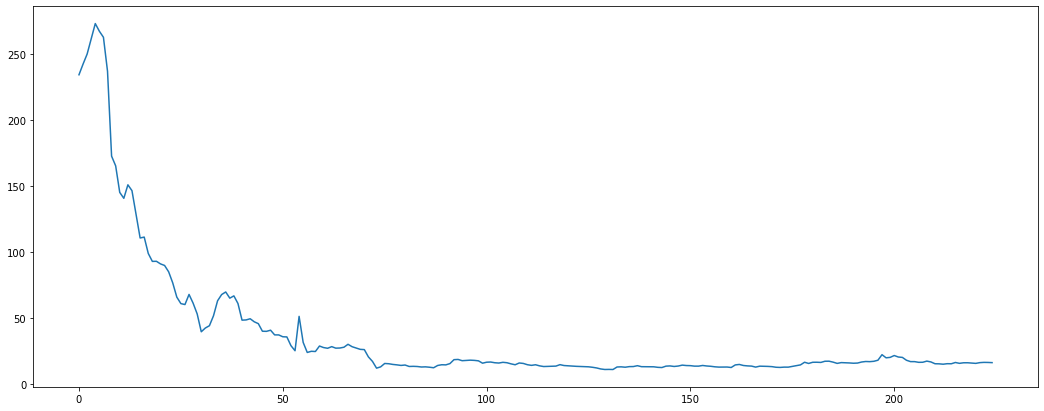

In [98]:
# we generated profit for period from 17.3.2019 to 25.6.2023.now we will compare our strategy profit with convntional
# buy and hold method

# plot a chart for tata motors for our testing period
plt1 = plt.figure(figsize=(18,7))
import matplotlib.pyplot as plt
plt.plot(df2['actual'])

In [101]:
# profit or loss made by conventional buy and hold method

#start period 
start_period = df['Close'][df.index == '2019-03-17']
start_period[0]

242.27000427246094

In [102]:
# end period 
end_period = df['Close'][df.index == '2023-06-25']
end_period[0]

16.14000015258789

In [103]:
# profit or loss for buy and hold

pnl_for_bah = end_period[0] - start_period[0]
pnl_for_bah

-226.13000411987304

In [104]:
Total_pnl

111.86666380564373

In [105]:
# now we calculate net profit on our strategy
# for simplicity we assume portfolio size of Rs.1,00,000/-

avg_share = np.round(100000/242) #we have taken end or high value here for assumption
avg_share

413.0

### Net profit

In [106]:
# we are refering zerodha brokerage calculator here for brokerage and tax calculation.link:https://zerodha.com/brokerage-calculator/#tab-equities
# net profir made by buy and hold method

#total tax and charges for one complete transaction calculated from zerodha website:https://zerodha.com/brokerage-calculator/#tab-equities
Total_tax_and_charges = 173

net_buy_hold_profit = (pnl_for_bah *avg_share)-Total_tax_and_charges
net_buy_hold_profit

-93564.69170150756

In [107]:
# net profir made by AI based strategy

net_profit = (Total_pnl*avg_share) - (Total_tax_and_charges* len(sell_count)) # or buy_count.both are same as we consider whole one complete transaction
net_profit 

43951.932151730856

In [108]:
# Total % net profit on our portfolio of Rs.100000 using buy and hold method

net_buy_hold_profit_percent = (net_buy_hold_profit *100)/100000
print(f'Total net profit percent generated by buy and hold method:{net_buy_hold_profit_percent}%')

Total net profit percent generated by buy and hold method:-93.56469170150757%


In [109]:
# Total % net profit on our portfolio of Rs.100000 using AI based strategy

net_profit_percent = (net_profit *100)/100000
print(f'Total net profit percent generated by AI based strategy:{net_profit_percent}%')

Total net profit percent generated by AI based strategy:43.95193215173085%


### so,where we might make loss of -93k(ie.lost 93% capital) by buy and hold method,if we use AI based strategy we will make 43k profit